## people_counting_from_images

In this notebook we will batch process a directory of images, printing the number of people counted in each image

In [24]:
from pathlib import Path
import json
import pandas as pd

In [2]:
images = list(Path("images/").rglob("*.jpg"))

In [3]:
images

[PosixPath('images/scenes/dog.jpg'),
 PosixPath('images/scenes/street.jpg'),
 PosixPath('images/scenes/farm.jpg'),
 PosixPath('images/scenes/pool.jpg'),
 PosixPath('images/scenes/supermarket.jpg'),
 PosixPath('images/scenes/crossing.jpg'),
 PosixPath('images/scenes/porsche.jpg'),
 PosixPath('images/scenes/people_car.jpg'),
 PosixPath('images/scenes/test-image3.jpg'),
 PosixPath('images/faces/me.jpg'),
 PosixPath('images/faces/idris.jpg'),
 PosixPath('images/faces/idris_2.jpg'),
 PosixPath('images/faces/family.jpg'),
 PosixPath('images/faces/face.jpg'),
 PosixPath('images/faces/couple.jpg')]

we can access the file name

In [4]:
images[0].name

'dog.jpg'

or get the path as a string

In [11]:
str(images[0])

'images/scenes/dog.jpg'

## Deepstack
setup deepstack

In [5]:
# deepstack credentials
IP_ADDRESS = 'localhost'
PORT = 5000
API_KEY =  "" # if you have not set an api_key, just pass an empty string

In [6]:
import deepstack.core as ds

In [7]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY)

Loop over images getting all predictions

In [13]:
%%time
results = [] # keep predictions

for i, img in enumerate(images):
    print(f"Processing image number {i} : {str(img)}")
    try:
        with open(img, 'rb') as image_bytes:
            dsobject.detect(image_bytes)
            predictions = dsobject.predictions
            
            results.append({
                'file': str(img),
                'predictions': predictions
            })
    except Exception as exc:
        print(exc)

Processing image number 0 : images/scenes/dog.jpg
Processing image number 1 : images/scenes/street.jpg
Processing image number 2 : images/scenes/farm.jpg
Processing image number 3 : images/scenes/pool.jpg
Processing image number 4 : images/scenes/supermarket.jpg
Processing image number 5 : images/scenes/crossing.jpg
Processing image number 6 : images/scenes/porsche.jpg
Processing image number 7 : images/scenes/people_car.jpg
Processing image number 8 : images/scenes/test-image3.jpg
Processing image number 9 : images/faces/me.jpg
Processing image number 10 : images/faces/idris.jpg
Processing image number 11 : images/faces/idris_2.jpg
Processing image number 12 : images/faces/family.jpg
Processing image number 13 : images/faces/face.jpg
Processing image number 14 : images/faces/couple.jpg
CPU times: user 59.9 ms, sys: 20.7 ms, total: 80.6 ms
Wall time: 49.2 s


The results are in a standardised format

In [18]:
results[1]

{'file': 'images/scenes/street.jpg',
 'predictions': [{'confidence': 0.99951047,
   'label': 'car',
   'y_min': 608,
   'x_min': 1068,
   'y_max': 946,
   'x_max': 1785},
  {'confidence': 0.99831986,
   'label': 'car',
   'y_min': 405,
   'x_min': 846,
   'y_max': 586,
   'x_max': 1322},
  {'confidence': 0.941314,
   'label': 'car',
   'y_min': 559,
   'x_min': 318,
   'y_max': 775,
   'x_max': 815},
  {'confidence': 0.75337636,
   'label': 'car',
   'y_min': 179,
   'x_min': 642,
   'y_max': 298,
   'x_max': 806},
  {'confidence': 0.58366394,
   'label': 'car',
   'y_min': 782,
   'x_min': 2086,
   'y_max': 1020,
   'x_max': 2245},
  {'confidence': 0.94268125,
   'label': 'truck',
   'y_min': 120,
   'x_min': 889,
   'y_max': 228,
   'x_max': 1091},
  {'confidence': 0.5385787,
   'label': 'truck',
   'y_min': 166,
   'x_min': 641,
   'y_max': 297,
   'x_max': 846}]}

We can write to json file

In [17]:
with open('outputs/results.json', 'w') as fp:
    json.dump(results, fp)

Lets get the number of people in each image using a helper from deepstack-python

In [21]:
people = {}
for pred in results:
    people[Path(pred['file']).name] = len(ds.get_object_confidences(pred['predictions'], 'person'))

In [22]:
people

{'dog.jpg': 0,
 'street.jpg': 0,
 'farm.jpg': 0,
 'pool.jpg': 18,
 'supermarket.jpg': 0,
 'crossing.jpg': 20,
 'porsche.jpg': 0,
 'people_car.jpg': 2,
 'test-image3.jpg': 2,
 'me.jpg': 1,
 'idris.jpg': 1,
 'idris_2.jpg': 1,
 'family.jpg': 3,
 'face.jpg': 4,
 'couple.jpg': 2}

Visualise using pandas

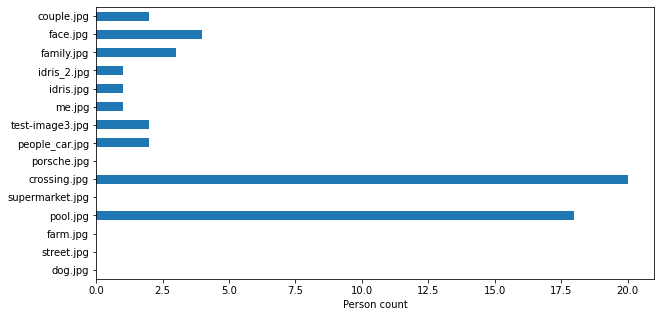

In [34]:
pd.Series(people).plot.barh(figsize=(10,5)).set_xlabel('Person count');